In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime

In [2]:
mp.rc_file_defaults()
rc = {'axes.facecolor':'white','grid.color': '.8',}
plt.rcParams.update(rc)
sns.set_palette(sns.color_palette("RdPu", 6))
palette = ["#fcd7d3","#faabb8","#f667a0","#cd238e","#cd238e"]

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Customer%20Personality%20Analysis%20/Customer%20Personality%20Analysis/marketing_campaign.csv", sep="\t")
print("Data loaded with", len(data), "rows")
data.head()

Data loaded with 2240 rows


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
data= data.drop(["ID","Z_CostContact", "Z_Revenue"], axis=1)
data= data.dropna()
data["Dt_Customer"]= pd.to_datetime(data["Dt_Customer"])

In [6]:
print("Education Values: ", data["Education"].unique())
print("Marital_Status Values:", data["Marital_Status"].unique())

Education Values:  ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status Values: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [7]:
edu= {"Basic": "Undergraduate", "2n Cycle": "Undergraduate", "Graduation": "Graduate", "Master": "Postgraduate", "PhD": "Postgraduate"}
data["Education"]= data["Education"].replace(edu)
status= {"YOLO": "Single", "Absurd": "Single", "Alone": "Single", "Widow": "Single", "Divorced": "Single", "Together": "Taken", "Married": "Taken"}
data["Marital_Status"]= data["Marital_Status"].replace(status)
print("Education Values: ", data["Education"].unique())
print("Marital_Status Values:", data["Marital_Status"].unique())

Education Values:  ['Graduate' 'Postgraduate' 'Undergraduate']
Marital_Status Values: ['Single' 'Taken']


In [8]:
data["Age"]= datetime.now().year-data["Year_Birth"]
data["Children_Count"]= data["Kidhome"]+data["Teenhome"]
data["Family_Size"]= 1+data["Children_Count"]+data["Marital_Status"].replace({"Taken": 1, "Single": 0})
data["Customer_For"]= (datetime.now()-data["Dt_Customer"]).dt.days
data["Spendings"]= data["MntWines"]+data["MntFruits"]+data["MntFishProducts"]+data["MntMeatProducts"]+data["MntSweetProducts"]+data["MntGoldProds"]
data["Purchases"]= data["NumDealsPurchases"]+data["NumWebPurchases"]+data["NumCatalogPurchases"]+data["NumStorePurchases"]
data["Accepted_Campaigns"]= data["AcceptedCmp1"]+data["AcceptedCmp2"]+data["AcceptedCmp3"]+data["AcceptedCmp4"]+data["AcceptedCmp5"]
data= data.drop(["Year_Birth","Dt_Customer"],axis=1)

Number of customers above the age of 100=  3
Number of customers with income above 200,000=  1


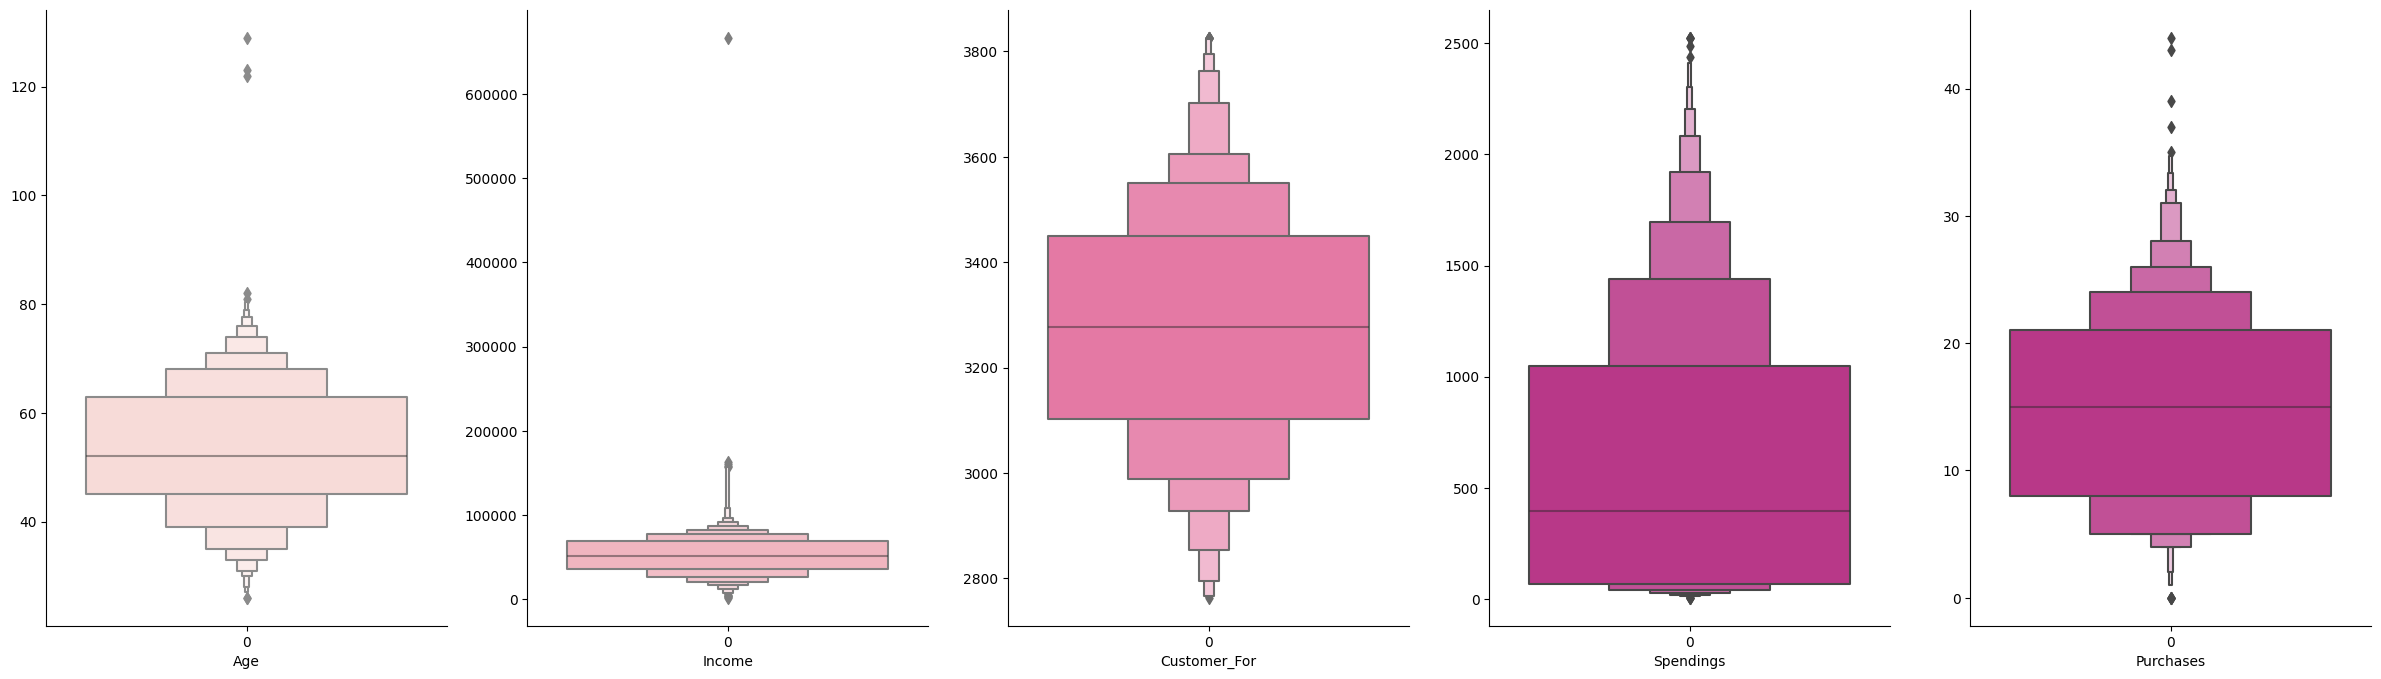

In [9]:
features= ["Age", "Income", "Customer_For", "Spendings", "Purchases"]
fig, axs = plt.subplots(ncols=len(features),figsize=(6*len(features),8))
for i in range(len(features)):
  sns.boxenplot(data=data[features[i]],
                showfliers=True,
                ax=axs[i],
                palette=[palette[i]]
                ).set(xlabel=features[i])
  sns.despine()
print("Number of customers above the age of 100= ", len(data[data["Age"]>100]))
print("Number of customers with income above 200,000= ", len(data[data["Income"]>200000]))

In [10]:
data= data.drop(data[(data["Age"]>100) | (data["Income"]>200000)].index)
print("Current data points count= ",len(data))

Current data points count=  2212


In [11]:
dataCopy= data.copy()
data= data.drop(["Kidhome","Teenhome"],axis=1)

In [12]:
encoder= LabelEncoder()
data["Education"]= data[["Education"]].apply(encoder.fit_transform)
data = pd.get_dummies(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Education              2212 non-null   int64  
 1   Income                 2212 non-null   float64
 2   Recency                2212 non-null   int64  
 3   MntWines               2212 non-null   int64  
 4   MntFruits              2212 non-null   int64  
 5   MntMeatProducts        2212 non-null   int64  
 6   MntFishProducts        2212 non-null   int64  
 7   MntSweetProducts       2212 non-null   int64  
 8   MntGoldProds           2212 non-null   int64  
 9   NumDealsPurchases      2212 non-null   int64  
 10  NumWebPurchases        2212 non-null   int64  
 11  NumCatalogPurchases    2212 non-null   int64  
 12  NumStorePurchases      2212 non-null   int64  
 13  NumWebVisitsMonth      2212 non-null   int64  
 14  AcceptedCmp3           2212 non-null   int64  
 15  Acce

In [13]:
scaler= StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data),columns = data.columns)
data.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Response,Age,Children_Count,Family_Size,Customer_For,Spendings,Purchases,Accepted_Campaigns,Marital_Status_Single,Marital_Status_Taken
0,-0.893586,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,...,2.375425,1.018352,-1.264598,-1.758359,1.973583,1.676245,1.317945,-0.43916,1.349603,-1.349603
1,-0.893586,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,...,-0.420977,1.274785,1.404572,0.449070,-1.665144,-0.963297,-1.159273,-0.43916,1.349603,-1.349603
2,-0.893586,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,...,-0.420977,0.334530,-1.264598,-0.654644,-0.172664,0.280110,0.796425,-0.43916,-0.740959,0.740959
3,-0.893586,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,...,-0.420977,-1.289547,0.069987,0.449070,-1.923210,-0.920135,-0.898513,-0.43916,-0.740959,0.740959
4,0.571657,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,...,-0.420977,-1.033114,0.069987,0.449070,-0.822130,-0.307562,0.535666,-0.43916,-0.740959,0.740959


<AxesSubplot:>

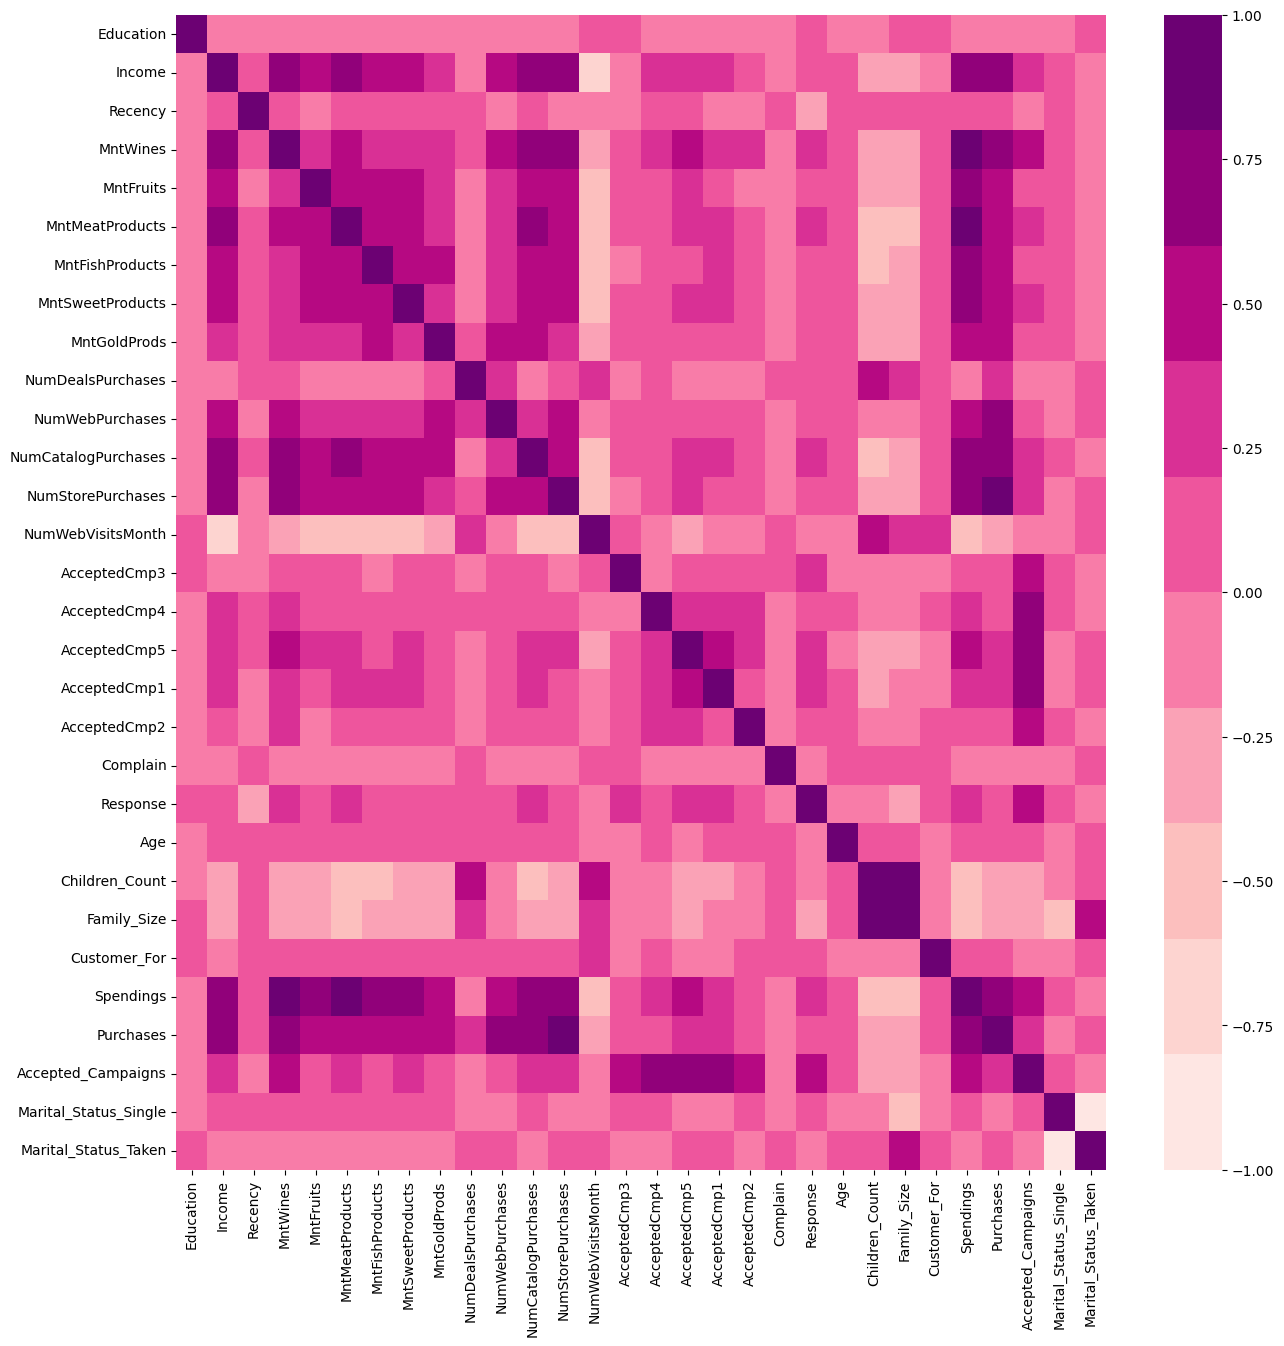

In [14]:
fig, ax = plt.subplots(figsize=(15,15))         
sns.heatmap(data.corr(),
            cmap= sns.color_palette("RdPu", 10),
            ax=ax)

In [15]:
pca = PCA(n_components = 0.95)
pca.fit(data)
reduced_data = pd.DataFrame(pca.transform(data))
print("Current number of features= ",len(reduced_data.columns))

Current number of features=  20


In [16]:
pca = PCA(n_components = 0.75)
pca.fit(data)
reduced_data = pd.DataFrame(pca.transform(data))

print("Current number of features= ",len(reduced_data.columns))

Current number of features=  10


<ipython-input-17-54bfe2f1e354>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, distortions, 'bx-', color=palette[-1])


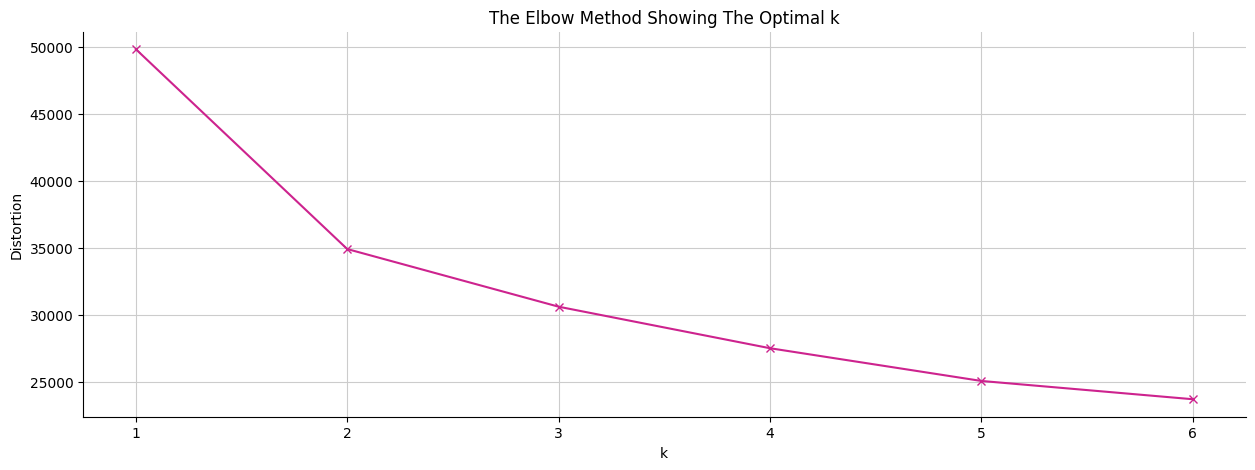

In [17]:
distortions = []
K = range(1,7)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(reduced_data)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(15,5))
plt.rcParams.update({'axes.grid': True})
plt.plot(K, distortions, 'bx-', color=palette[-1])
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing The Optimal k')
sns.despine()
plt.show()

In [18]:
clusters = KMeans(n_clusters=4, random_state=202).fit(reduced_data)
data["Personality"]= clusters.labels_
dataCopy["Personality"]= clusters.labels_
data.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Age,Children_Count,Family_Size,Customer_For,Spendings,Purchases,Accepted_Campaigns,Marital_Status_Single,Marital_Status_Taken,Personality
0,-0.893586,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,...,1.018352,-1.264598,-1.758359,1.973583,1.676245,1.317945,-0.43916,1.349603,-1.349603,1
1,-0.893586,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,...,1.274785,1.404572,0.449070,-1.665144,-0.963297,-1.159273,-0.43916,1.349603,-1.349603,0
2,-0.893586,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,...,0.334530,-1.264598,-0.654644,-0.172664,0.280110,0.796425,-0.43916,-0.740959,0.740959,1
3,-0.893586,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,...,-1.289547,0.069987,0.449070,-1.923210,-0.920135,-0.898513,-0.43916,-0.740959,0.740959,0
4,0.571657,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,...,-1.033114,0.069987,0.449070,-0.822130,-0.307562,0.535666,-0.43916,-0.740959,0.740959,2


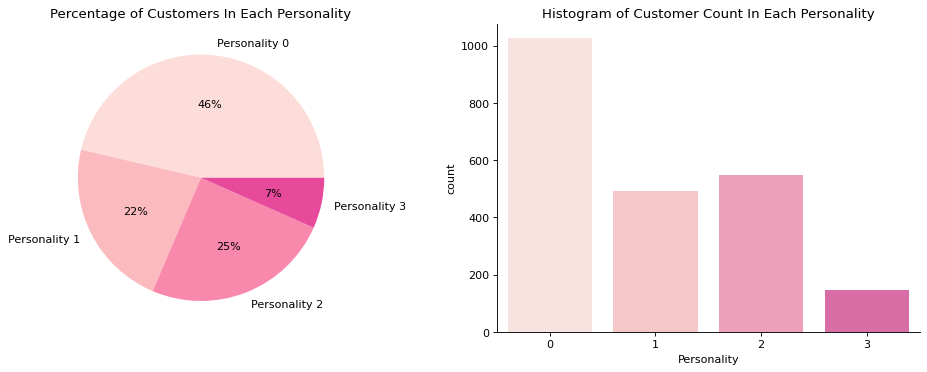

In [20]:
labels = ['Personality 0', 'Personality 1', 'Personality 2', 'Personality 3']
counts= []

for i in range(4):
  counts.append(len(data[data["Personality"]==i]))

plt.figure(figsize=(15, 5), dpi=80)
plt.rcParams.update({'axes.grid': False})

ax1 = plt.subplot2grid((1,2),(0,0))
ax1.set_title("Percentage of Customers In Each Personality")
plt.pie(counts, labels = labels, autopct='%.0f%%')

ax1 = plt.subplot2grid((1,2), (0, 1))
ax1.set_title("Histogram of Customer Count In Each Personality")
sns.countplot(x=data["Personality"], alpha=.9, ax=ax1)
sns.despine()

plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


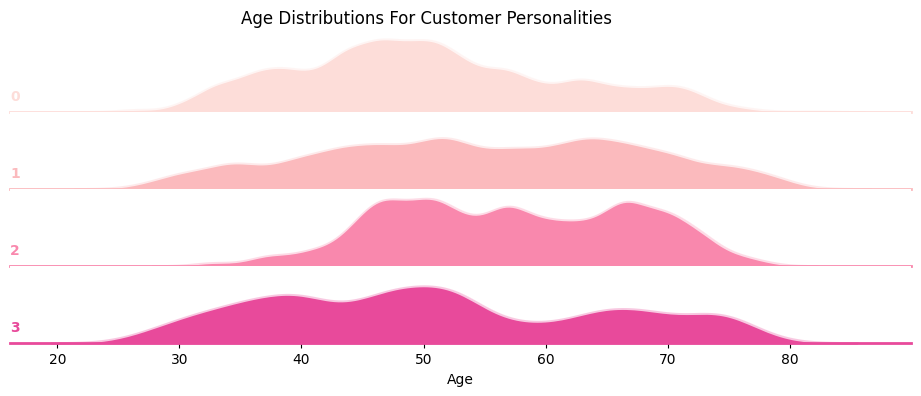

In [21]:
g = sns.FacetGrid(dataCopy,
                  row="Personality",
                  hue="Personality",
                  size= 1, aspect=10,
                  )

g.map(sns.kdeplot, "Age",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Age", clip_on=False, color="w", lw=2, bw_adjust=.5,alpha=.7)

g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

def label(Age, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Age")
g.figure.subplots_adjust(hspace=0.01)
g.fig.suptitle('Age Distributions For Customer Personalities')
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [22]:
d= dataCopy[dataCopy["Personality"]==0]
perc= (len(d[d["Age"]<60])/len(d))*100
print("Percentage of customer below 60 in personality 0= {:.2f}% ".format(perc))

d= dataCopy[dataCopy["Personality"]==1]
perc= (len(d[d["Age"]<55])/len(d))*100
print("Percentage of customer below 55 in personality 1= {:.2f}% ".format(perc))

d= dataCopy[dataCopy["Personality"]==2]
perc= (len(d[d["Age"]>50])/len(d))*100
print("Percentage of customer above 50 in personality 2= {:.2f}% ".format(perc))
d= dataCopy[dataCopy["Personality"]==3]
perc= (len(d[d["Age"]<60])/len(d))*100
print("Percentage of customer below 60 in personality 3= {:.2f}% ".format(perc))

Percentage of customer below 60 in personality 0= 78.54% 
Percentage of customer below 55 in personality 1= 50.00% 
Percentage of customer above 50 in personality 2= 70.07% 
Percentage of customer below 60 in personality 3= 70.75% 


In [23]:
d= dataCopy[dataCopy["Personality"]==0]
perc= (len(d[d["Age"]<60])/len(d))*100
print("Percentage of customer below 60 in personality 0= {:.2f}% ".format(perc))

d= dataCopy[dataCopy["Personality"]==1]
perc= (len(d[d["Age"]<55])/len(d))*100
print("Percentage of customer below 55 in personality 1= {:.2f}% ".format(perc))

d= dataCopy[dataCopy["Personality"]==2]
perc= (len(d[d["Age"]>50])/len(d))*100
print("Percentage of customer above 50 in personality 2= {:.2f}% ".format(perc))
d= dataCopy[dataCopy["Personality"]==3]
perc= (len(d[d["Age"]<60])/len(d))*100
print("Percentage of customer below 60 in personality 3= {:.2f}% ".format(perc))

Percentage of customer below 60 in personality 0= 78.54% 
Percentage of customer below 55 in personality 1= 50.00% 
Percentage of customer above 50 in personality 2= 70.07% 
Percentage of customer below 60 in personality 3= 70.75% 


In [24]:
d= dataCopy[dataCopy["Personality"]==0]
perc= (len(d[d["Marital_Status"]=="Single"])/len(dataCopy[dataCopy["Marital_Status"]=="Single"]))*100
print("Percentage of single parents belonging to personality 0= {:.2f}% ".format(perc))

Percentage of single parents belonging to personality 0= 46.56% 


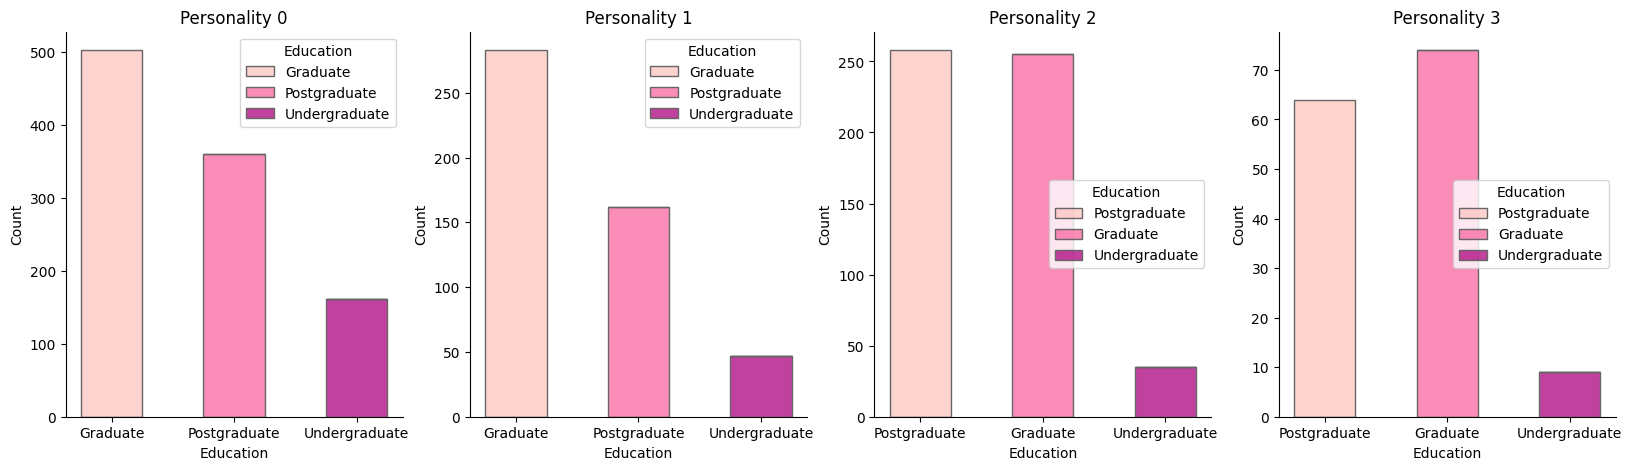

In [25]:
plt.figure(figsize=(20, 5))
for i in range(4):
  ax1 = plt.subplot2grid((1,4),(0,i))
  ax1.set_title("Personality "+str(i))
  sns.histplot(
      dataCopy[dataCopy["Personality"]==i],
      x="Education",
      hue= "Education",
      multiple="stack",
      palette="RdPu",
      edgecolor=".4",
      shrink= .5
  )
  sns.despine()

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


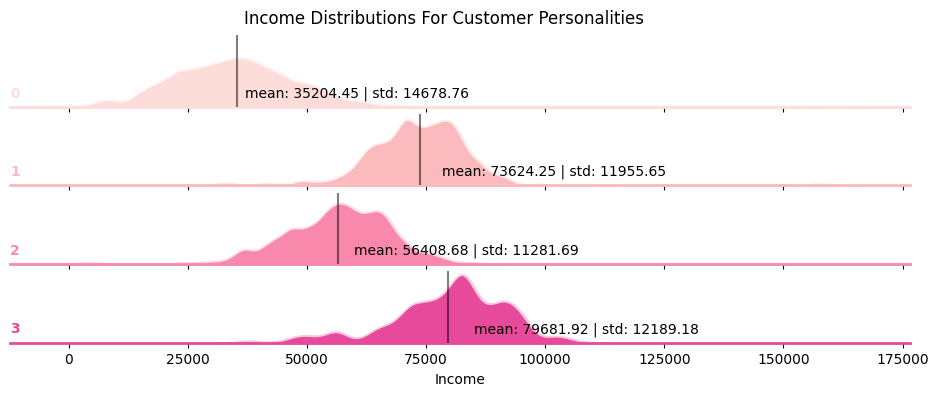

In [26]:
g = sns.FacetGrid(dataCopy,
                  row="Personality",
                  hue="Personality",
                  size= 1, aspect=10,
                  )

g.map(sns.kdeplot, "Income",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Income", clip_on=False, color="w", lw=2, bw_adjust=.5, alpha=.7)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
def label(Income, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Income")

def vertical_mean_line_survived(x, **kwargs):
    plt.axvline(x.mean(), linestyle ="-", 
                color = "black", alpha=.5)
    txkw = dict(size=10, color = "black")
    tx = "mean: {:.2f} | std: {:.2f}".format(x.mean(),x.std())
    ax = plt.gca()
    ax.text(0.06+x.mean()/175000, .2, tx, color="black", size= 10,
            ha="left", va="center", transform=ax.transAxes)
g.map(vertical_mean_line_survived, 'Income')
g.figure.subplots_adjust(hspace=0.1)
g.fig.suptitle('Income Distributions For Customer Personalities')
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

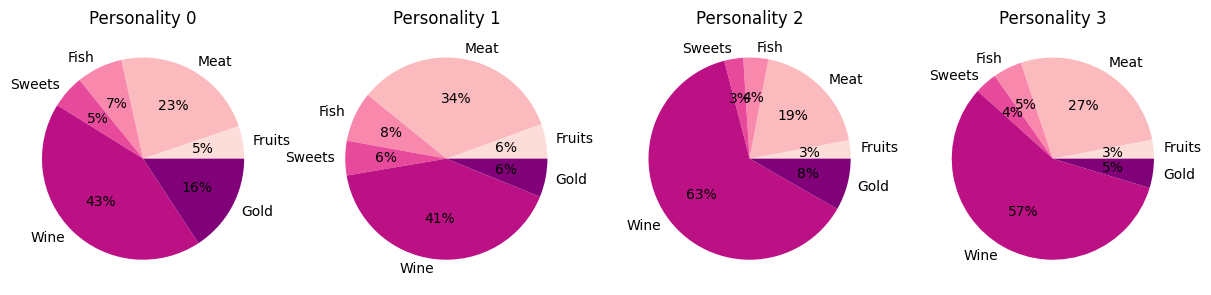

In [27]:
labels = ['Fruits', 'Meat', 'Fish', 'Sweets', 'Wine', 'Gold']
plt.figure(figsize=(15, 10), dpi=100)
for i in range(4):
  counts= []
  d= dataCopy[dataCopy["Personality"]==i]
  counts.append(d["MntFruits"].sum())
  counts.append(d["MntMeatProducts"].sum())
  counts.append(d["MntFishProducts"].sum())
  counts.append(d["MntSweetProducts"].sum())
  counts.append(d["MntWines"].sum())
  counts.append(d["MntGoldProds"].sum())
  ax1 = plt.subplot2grid((1,4),(0,i))
  ax1.set_title("Personality "+str(i))
  plt.pie(counts, labels = labels, autopct='%.0f%%')

plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


<Figure size 400x400 with 0 Axes>

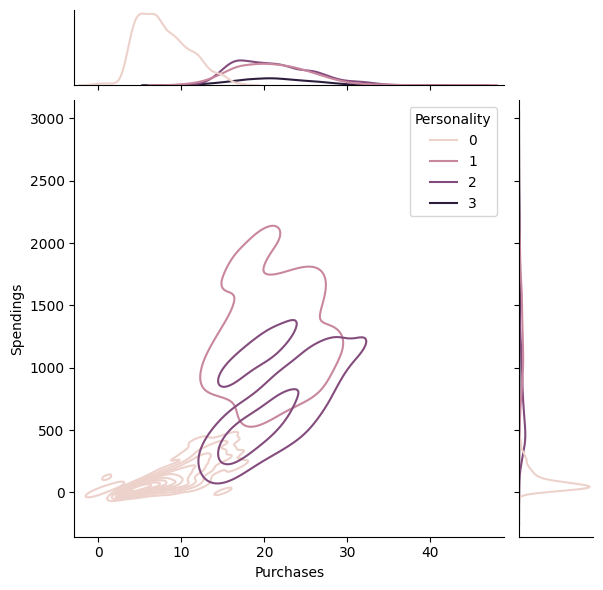

In [28]:
plt.figure(figsize=(5, 5), dpi=80)
g = sns.jointplot(data=dataCopy, x="Purchases", y="Spendings", hue="Personality",kind="kde")
sns.despine()

<Figure size 400x400 with 0 Axes>

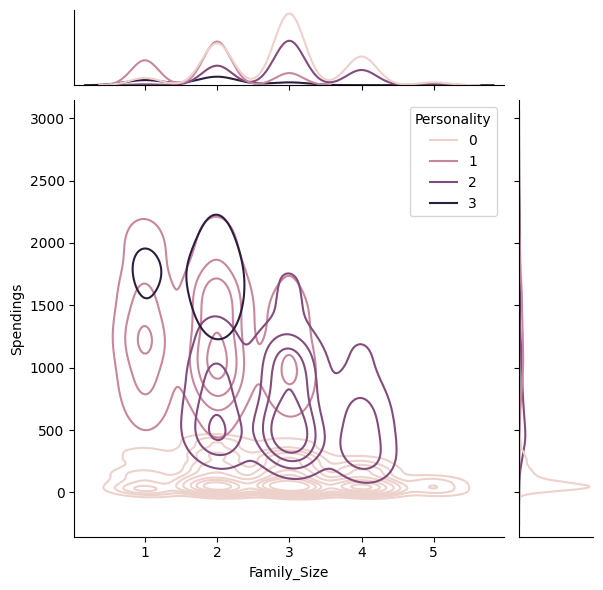

In [29]:
plt.figure(figsize=(5, 5), dpi=80)
g = sns.jointplot(data=dataCopy, x="Family_Size", y="Spendings", hue="Personality",kind="kde")
sns.despine()

<Figure size 400x400 with 0 Axes>

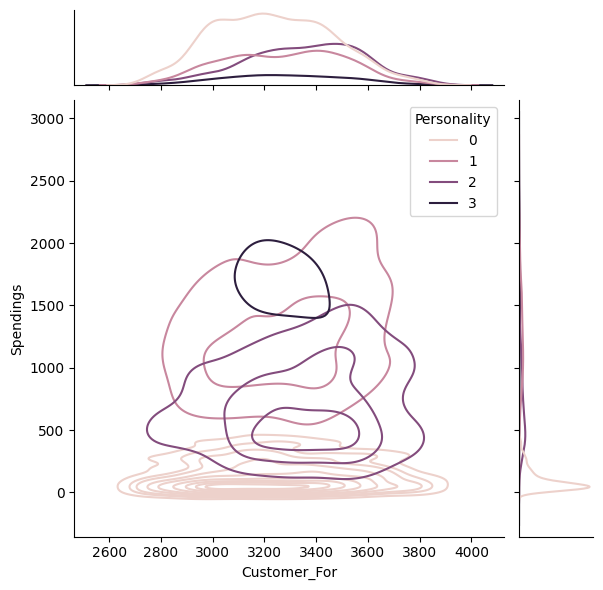

In [30]:
plt.figure(figsize=(5, 5), dpi=80)
g = sns.jointplot(data=dataCopy, x="Customer_For", y="Spendings", hue="Personality",kind="kde")
sns.despine()

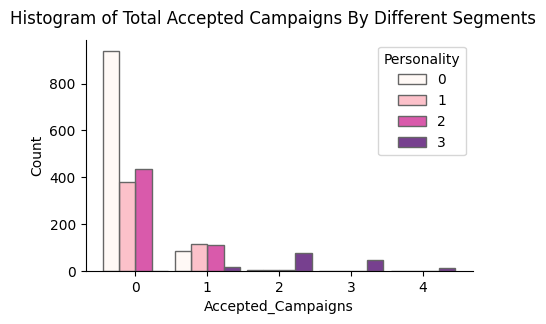

In [32]:
f= plt.figure(figsize=(5, 3))
f.suptitle("Histogram of Total Accepted Campaigns By Different Segments")
sns.histplot(dataCopy, x="Accepted_Campaigns", hue= "Personality", multiple="dodge", palette="RdPu", edgecolor=".4", discrete= True, shrink= .9)
sns.despine()